In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/SD.csv'  # 请确保您的数据文件路径是正确的
df = pd.read_csv(data_path)
df.head()

,成本,价格
0,1.0,39451
1,1.1,40343
2,1.2,46313
3,1.3,47605
4,1.4,37839


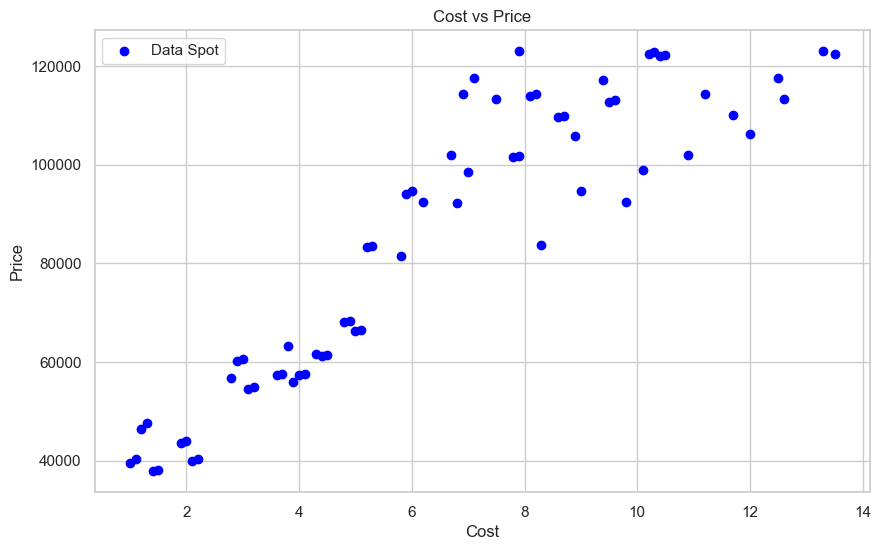

In [29]:
# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['成本'], df['价格'], color='blue', label='Data Spot')
plt.title('Cost vs Price')
plt.xlabel('Cost')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    """
    实现梯度下降算法来优化线性回归模型的参数。
    """
    m = len(y)
    X = np.hstack((np.ones((m, 1)), X))  # 添加一列 1 作为偏置项
    theta = np.zeros(X.shape[1])
    loss_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
        loss = np.mean(errors ** 2) / 2
        loss_history.append(loss)

    return theta, loss_history

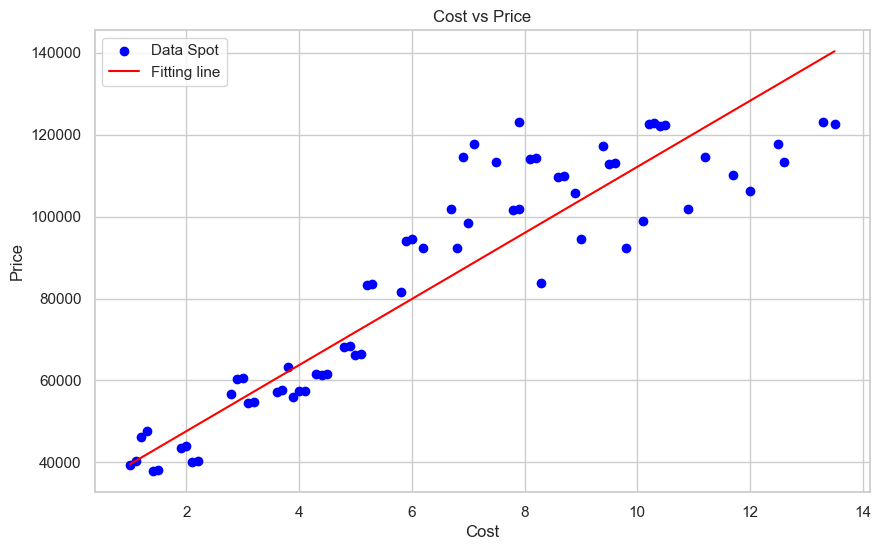

The regression equation is: Price = 31490.83 + 8063.88 * Cost


In [31]:
# 准备数据
X = df[['成本']]
y = df['价格']

# 使用梯度下降优化参数
theta, _ = gradient_descent(X, y, iterations=1000)

# 绘制回归拟合图
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Spot')
plt.plot(X, theta[0] + theta[1] * X, color='red', label='Fitting line')
plt.title('Cost vs Price')
plt.xlabel('Cost')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 显示回归方程
print(f"The regression equation is: Price = {theta[0]:.2f} + {theta[1]:.2f} * Cost")

In [32]:
# 分析迭代次数对性能的影响
iteration_counts = [50, 100, 200, 500, 1000,2000]
losses = []

for iterations in iteration_counts:
    _, loss_history = gradient_descent(X, y, iterations=iterations)
    losses.append(loss_history[-1])

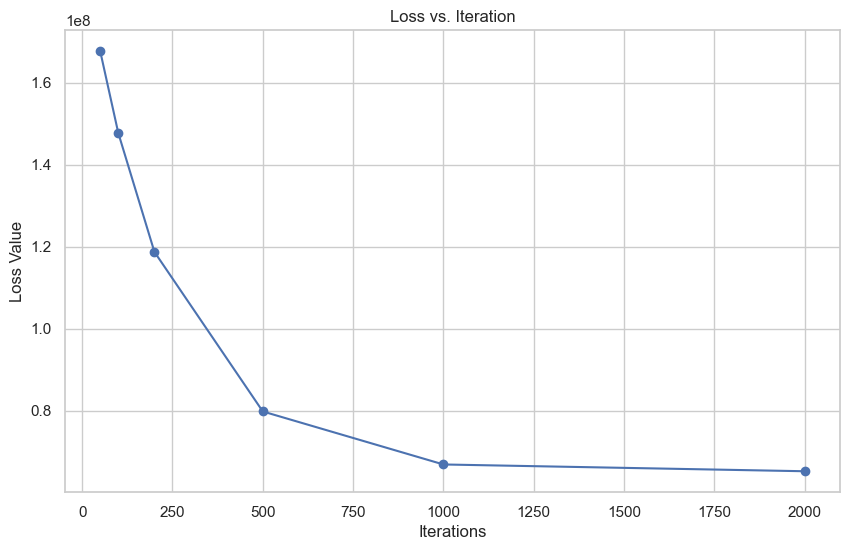

In [33]:
# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, losses, marker='o')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()

# Bonus 实验

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_path = './data/ML Feedback.csv'  
df = pd.read_csv(data_path)

df.head()

,序号,你是否完成了实验一的Bonus部分？,你是否认为额外实验的工作是对能力有提升的？,你对于这种安排的满意度如何？,提交人,修改人,提交时间,修改时间,填写时长,填写设备,操作系统,浏览器,填写地区,IP
0,1,否,是,2,NaN,NaN,2023-11-08 09:00:51,2023-11-08 09:00:51,34秒,Android,Android 10,Wechat Browser 8.0.42.2460(0x28002A58),北京市,111.194.239.45
1,2,是,是,3,NaN,NaN,2023-11-08 09:01:25,2023-11-08 09:01:25,1分1秒,iPhone,iOS 16.1,Wechat Browser 8.0.42(0x18002a32),北京市,124.64.18.153
2,3,是,否,3,NaN,NaN,2023-11-08 09:02:27,2023-11-08 09:02:27,31秒,Android,Android 12,Wechat Browser 8.0.42.2460(0x28002A58),北京市,124.64.22.205
3,4,是,否,1,NaN,NaN,2023-11-08 09:02:56,2023-11-08 09:02:56,32秒,Android,Android 13,Wechat Browser 8.0.42.2460(0x28002A58),北京市,124.127.78.24
4,5,是,否,2,NaN,NaN,2023-11-08 09:03:01,2023-11-08 09:03:01,19秒,Android,Android 12,Wechat Browser 8.0.42.2460(0x28002A58),北京市,223.72.85.130


In [35]:
rename_pairs = {
    '你是否完成了实验一的Bonus部分？': 'Bonus', 
    '你是否认为额外实验的工作是对能力有提升的？': 'Enhancement',
    '你对于这种安排的满意度如何？': 'Satisfaction',
    '填写时长': 'Time'
}

for key, value in list(rename_pairs.items())[:2]:
    df[value] = df[key].map({'是': 1, '否': 0})

df = df.drop(columns=list(rename_pairs.keys())[:2])

# 数据预处理：重命名列
df.rename(columns = rename_pairs, inplace=True)

def convert_to_seconds(time_str):
    total_seconds = 0
    parts = time_str.split('分')
    if len(parts) == 2:
        # 有分钟部分
        total_seconds += int(parts[0]) * 60
        seconds_part = parts[1].replace('秒', '')
        if seconds_part:
            total_seconds += int(seconds_part)
    else:
        # 只有秒部分
        total_seconds += int(parts[0].replace('秒', ''))
    return total_seconds

# 应用函数转换时间
df['Time_in_seconds'] = df['Time'].apply(convert_to_seconds)

# 使用条件索引删除小于等于15秒的数据
df = df[df['Time'].apply(convert_to_seconds) > 15]
columns_to_keep = ['Bonus', 'Enhancement', 'Satisfaction', 'Time_in_seconds']

# 保留这些列
df_filtered = df[columns_to_keep]

df_filtered.head()

,Bonus,Enhancement,Satisfaction,Time_in_seconds
0,0,1.0,2,34
1,1,1.0,3,61
2,1,0.0,3,31
3,1,0.0,1,32
4,1,0.0,2,19


In [36]:
df_filtered.describe()

,Bonus,Enhancement,Satisfaction,Time_in_seconds
count,22.000000,21.000000,22.000000,22.000000
mean,0.500000,0.190476,1.954545,48.954545
std,0.511766,0.402374,0.722250,34.031466
min,0.000000,0.000000,1.000000,16.000000
25%,0.000000,0.000000,1.250000,27.000000
50%,0.500000,0.000000,2.000000,33.000000
75%,1.000000,0.000000,2.000000,76.000000
max,1.000000,1.000000,3.000000,120.000000


由于调查时对能力提升问题只给出了“是否”选项，所以这里做一个随机处理。

In [37]:
# 根据原始值随机化Enhancement列的值
def randomize_enhancement(value):
    if value == 0:
        return np.random.uniform(0, 0.5)
    elif value == 1:
        return np.random.uniform(0.5, 1)
    else:
        return value * 5

# 应用函数
df_filtered['Enhancement'] = df_filtered['Enhancement'].apply(randomize_enhancement)

# 保存修改后的数据为CSV文件
output_path = 'ML_Feedback_Modified.csv'
df_filtered.to_csv(output_path, index=False)

/var/folders/lj/lmb91jvd0zb9d59rd05y9xhw0000gn/T/ipykernel_48335/566377120.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Enhancement'] = df_filtered['Enhancement'].apply(randomize_enhancement)


In [38]:
# 移除Enhancement为空的行
df_filtered_cleaned = df_filtered.dropna(subset=['Enhancement'])

# 显示清理后数据的前几行
df_filtered_cleaned.describe()

,Bonus,Enhancement,Satisfaction,Time_in_seconds
count,21.000000,21.000000,21.000000,21.000000
mean,0.476190,0.378216,1.904762,45.904762
std,0.511766,0.279351,0.700340,31.641594
min,0.000000,0.034312,1.000000,16.000000
25%,0.000000,0.175982,1.000000,27.000000
50%,0.000000,0.351057,2.000000,32.000000
75%,1.000000,0.493868,2.000000,61.000000
max,1.000000,0.995166,3.000000,120.000000


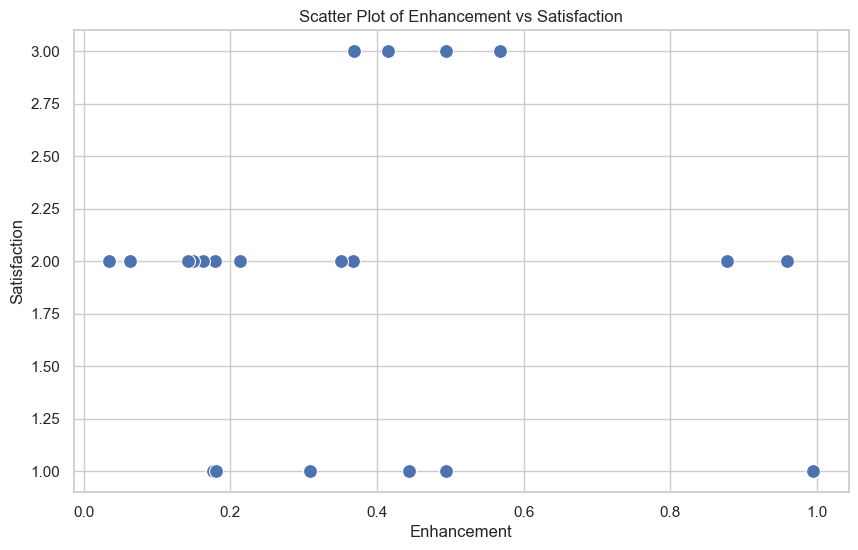

In [39]:
import seaborn as sns

sns.set(style="whitegrid")

# Create a scatter plot with Enhancement and Satisfaction as coordinates
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_filtered_cleaned, x='Enhancement', y='Satisfaction', s=100)

# Set plot titles and labels
plt.title('Scatter Plot of Enhancement vs Satisfaction')
plt.xlabel('Enhancement')
plt.ylabel('Satisfaction')

plt.show()

In [40]:
# 假设“满意度”是因变量，其他的是自变量
# 提取自变量（特征）和因变量（目标）
X = df_filtered_cleaned[['Bonus', 'Enhancement', 'Time_in_seconds']]
y = df_filtered_cleaned['Satisfaction']

# 分割为训练集和测试集。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class MultivariateLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        """
        使用普通最小二乘法的闭式解来拟合模型。
        X：形状为（n_samples，n_features）的numpy数组
        y：形状为（n_samples，）的numpy数组
        """
        # 在输入特征中添加偏置列
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # 使用正规方程计算最佳参数
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        """
        使用训练好的模型进行预测。
        X: numpy数组的形状(n_samples, n_features)
        """
        # 在输入特征中添加偏置列
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # 计算预测
        return X_b.dot(np.r_[self.intercept, self.coefficients])

# 初始化线性回归模型
model_custom = MultivariateLinearRegression()

# 使用训练数据拟合模型
model_custom.fit(X_train, y_train)

# 预测测试集的满意度分数
y_pred_custom = model_custom.predict(X_test)

# 计算预测结果的均方误差（MSE）
mse_custom = mean_squared_error(y_test, y_pred_custom)

# 输出模型的系数和均方误差
coefficients_custom = model_custom.coefficients
intercept_custom = model_custom.intercept

# 格式化模型的方程式
model_equation = f"Satisfaction = {intercept_custom:.4f}"
for i, coef in enumerate(coefficients_custom):
    model_equation += f" + ({coef:.4f}) * X{i+1}"

(model_equation, mse_custom)

('Satisfaction = 1.9456 + (-0.1427) * X1 + (0.4233) * X2 + (-0.0031) * X3',
 0.5388756651509101)

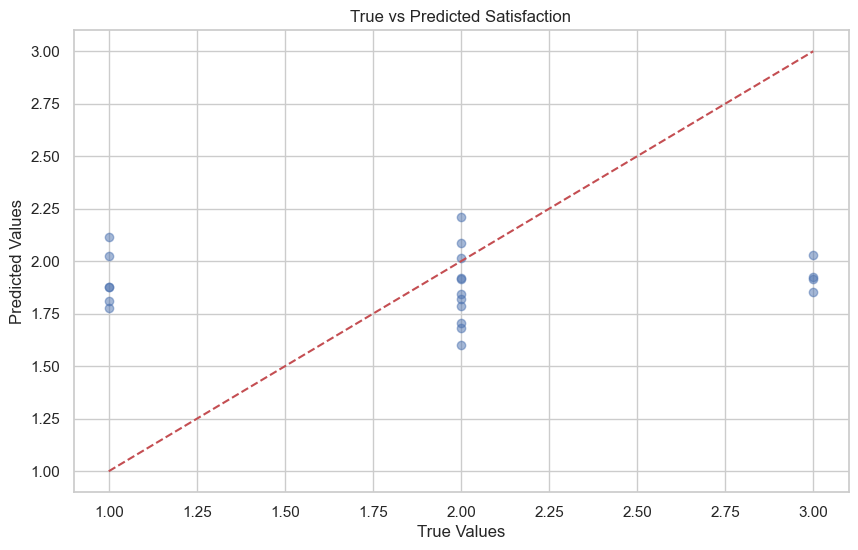

In [41]:
# 由于我们处理的是多个特征，无法绘制一条单独的线。
# 然而，我们可以绘制真实值与预测值之间的图表来观察模型性能。
# 对整个数据集进行满意度评分预测，并将其与真实值进行比较。

y_pred_entire_dataset = model_custom.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_entire_dataset, alpha=0.5)

plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')

plt.title('True vs Predicted Satisfaction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.show()